<a href="https://colab.research.google.com/github/KSohi-max/RAG_Agent_w_LangChain_Mistral/blob/main/RAG_Agent_with_LangChain_and_Mistral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3 - Final Assignment - RAG Agent with LangChain and Mistral-7B

This notebook is the final assignment for the course "Foundation of Large Language Models: Tools, Techniques and Applications". It presents an example of how to implement a RAG agent with LangChain and Mistral-7B.

An agent is a program that interacts with a user. It has a main task, which is to answer questions, and can use tools. For this example, the tool is a search engine. The agent will use the search engine to find information that is not in its prior knowledge.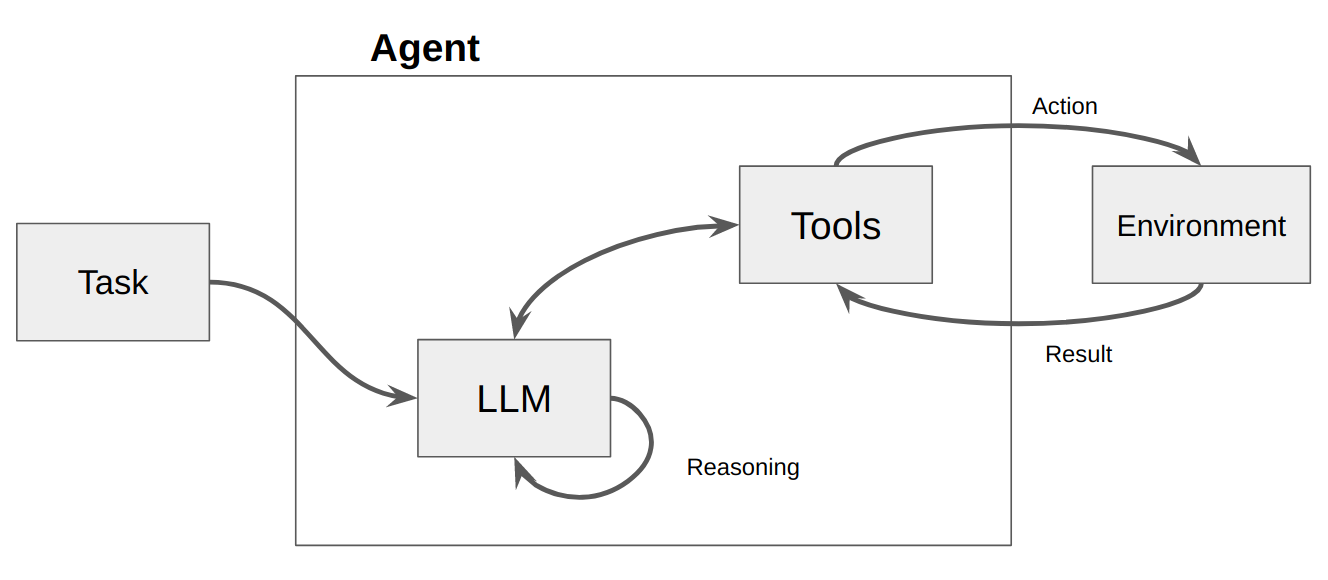


# Lab Assignment

For the lab assignment, search for **`TODO:`** in the cells and write your code to accomplish the task.

# Installing required packages

For this example, we will install the following libraries:

**`transformers`**:

Transformers is an open-source library for NLP developed by Hugging Face. It provides state-of-the-art pre-trained models for various NLP tasks, such as text classification, sentiment analysis, question-answering, named entity recognition, etc.

**`langchain`**:

Langchain is a library that facilitates the building of language model applications. It is designed to be used alongside models like those provided by the transformers library, and it offers tools and functionalities to streamline the integration of language models into various applications. This can include tasks like conversational agents, text generation, and more advanced NLP operations.

**`accelerate`**:

Accelerate is a library created by Hugging Face, designed to simplify the use of hardware acceleration (such as GPUs and TPUs) in machine learning projects. It provides an easy-to-use interface for distributing training and inference tasks across multiple devices, helping to significantly speed up the processing time for complex models. This library is particularly useful when working with large models or datasets, as it efficiently manages the hardware resources to optimize performance.

**`bitsandbytes`**:

BitsAndBytes is a library designed to optimize the training of neural networks on modern GPUs. It offers efficient implementations of 8-bit optimizers, which significantly reduce the memory footprint of model parameters and gradients. This reduction in memory usage enables training larger models or using larger batch sizes within the same memory constraints.

**`unstructured`**:

`unstructured` is a Python library designed for working with unstructured data in NLP. This library provides tools and functions to handle, process, and analyze data that does not fit into conventional row and column structures, such as text, images, and audio.


**`faiss-gpu`**:

`faiss-gpu` is a library primarily developed by Facebook AI Research (FAIR) for efficient similarity search and clustering of dense vectors. It is particularly optimized for use on GPUs, which allows it to perform large-scale similarity searches and clustering operations at high speed.


**`sentence-transformers`**:

`sentence-transformers` is a library developed by UKPLab, which provides a wide range of pre-trained models for computing sentence embeddings. It also offers a simple interface for fine-tuning these models on custom datasets, which can be used to improve the performance of the models on specific tasks.


In [ ]:
!pip install langchain
!pip install accelerate
!pip install transformers
!pip install bitsandbytes
!pip install unstructured
!pip install sentence-transformers
!pip install faiss-gpu # For CUDA 7.5+ Supported GPU's.
# OR
# !pip install faiss-cpu # For CPU Installation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.0/974.0 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 8.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 M

In [ ]:
!pip install langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.9 MB/s eta 0:00:00


# Setting the device

In this example, we will use a GPU to speed up the processing of our model. GPUs (Graphics Processing Units) are specialized processors that are optimized for performing large-scale computations in parallel. By using a GPU, we can accelerate the training and inference of a machine learning model, which can significantly reduce the time required to complete these tasks.

Before we begin, we need to check whether a GPU is available and select it as the default device for our PyTorch operations. This is because PyTorch can use either a CPU or a GPU to perform computations, and by default, it will use the CPU.

For using a GPU in Google Colab:
1. Click on the "Runtime" menu at the top of the screen.
2. From the dropdown menu, click on "Change runtime type".
3. In the popup window that appears, select "GPU" as the hardware accelerator.
4. Click on the "Save" button.

That's it! Now you can use the GPU for faster computations in your notebook.

In [ ]:
!nvidia-smi

Thu Jun 13 02:50:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0              45W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

# Import libraries

In the following code cell we import all the libraries at once. We will use the libraries as we go along.

In [ ]:
import torch

from textwrap import fill
from IPython.display import Markdown, display

from langchain.prompts.chat import (
    ChatPromptTemplate,
    HumanMessagePromptTemplate,
    SystemMessagePromptTemplate,
    )

from langchain import PromptTemplate
from langchain import HuggingFacePipeline

from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceBgeEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import UnstructuredURLLoader
from langchain.chains import RetrievalQA

from langchain.agents.format_scratchpad import format_log_to_str
from langchain.agents.output_parsers import ReActSingleInputOutputParser
from langchain.tools.render import render_text_description
from langchain.agents import tool
from langchain.prompts import PromptTemplate
from langchain.tools import  Tool

from transformers import BitsAndBytesConfig, AutoModelForCausalLM, AutoTokenizer, GenerationConfig, pipeline

import warnings
warnings.filterwarnings('ignore')

# Download and load Mistral-7B-Instruct

In this example, we will use Mistral-7B-Instruc, a language model with 7 billion parameters. Before loading the model, we have to define the quantization configuration. The quantization configuration is a dictionary that contains the quantization parameters for each layer. The quantization parameters are defined in the `BitsAndBytesConfig` class. The `BitsAndBytesConfig` class contains the following parameters:

- `load_in_4bit`: If True, the model will be loaded in 4-bit. If False, the model will be loaded in 8-bit.
- `bnb_4bit_compute_dtype`: The compute dtype for 4-bit quantization. The default value is `torch.float16`.
- `bnb_4bit_quant_type`: The quantization type for 4-bit quantization. The default value is `nf4`.
- `bnb_4bit_use_double_quant`: If True, the model will be quantized twice. The first quantization is done with the `bnb_4bit_compute_dtype` and the second quantization is done with `torch.float16`. The default value is `True`.


In [ ]:
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
)

Now, we can load the model and the tokenizer. The `trust_remote_code` parameter is set to `True` to allow the model to be loaded from the HuggingFace model hub. The `device_map` parameter is set to `auto` to allow the model to be loaded on the GPU if available. The `quantization_config` parameter is set to the quantization configuration defined above. We also set the `torch_dtype` parameter to `torch.float16` to load the model in 16-bit. The `use_fast` parameter is set to `True` to load the tokenizer in fast mode. Finally, we set the `pad_token` to the `eos_token` to allow the model to generate sequences of any length.


In [ ]:
from google.colab import userdata
HF_KEY = userdata.get('hf_api_key')


# from huggingface_hub import login
from huggingface_hub import login
login(HF_KEY)

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
MODEL_NAME = "mistralai/Mistral-7B-Instruct-v0.1"

model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME, torch_dtype=torch.float16,
    trust_remote_code=True,
    device_map="auto",
    quantization_config=quantization_config
)

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)
tokenizer.pad_token = tokenizer.eos_token

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

Then, we can define the generation configuration.
- The `max_new_tokens` parameter is set to 1024 to allow the model to generate sequences of up to 1024 tokens.
- The `temperature` parameter is set to 0.0001 to allow the model to generate sequences with a very low temperature.
- The `top_p` parameter is set to 0.95 to allow the model to generate sequences with a very high top-p.
- The `do_sample` parameter is set to `True` to allow the model to generate sequences with sampling. - The `repetition_penalty` parameter is set to 1.15 to allow the model to generate sequences with a high repetition penalty.
- Finally, we set the `return_full_text` parameter to `True` to allow the model to return the full generated text.

In [ ]:
generation_config = GenerationConfig.from_pretrained(MODEL_NAME)
generation_config.max_new_tokens = 1024
generation_config.temperature = 0.0001
generation_config.top_p = 0.95
generation_config.do_sample = True
generation_config.repetition_penalty = 1.15

pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    return_full_text=True,
    generation_config=generation_config,
)

# Testing the model

Now, we can test the model. First, let's define the LLM object using the `HuggingFacePipeline` from `langchain`. We do this by passing the pipeline defined above to the `pipeline` parameter.

In [ ]:
llm = HuggingFacePipeline(
    pipeline=pipeline,
    model_kwargs={"batch_size": 2, "max_length": 128},  # Adjust these values as needed
)

Now, let's test the model on a simple query.

In [ ]:
query = "Explain the difference between ChatGPT and open source LLMs in a couple of lines."
result = llm(
    query
)

display(Markdown(f"<b>{query}</b>"))
display(Markdown(f"<p>{result}</p>"))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<b>Explain the difference between ChatGPT and open source LLMs in a couple of lines.</b>

<p>Explain the difference between ChatGPT and open source LLMs in a couple of lines.
ChatGPT is a proprietary model developed by OpenAI, while open source LLMs are models that are made available for anyone to use, modify, and distribute under an open-source license.</p>

We can see that the model is able to generate a coherent answer to the query. Now, let's test the model on a query about **Ayrton Senna**, a Brazilian racing driver who won the Formula One World Drivers' Championship three times.

In [ ]:
query = "Who is Ayrton Senna?"
result = llm(
    query
)

display(Markdown(f"<b>{query}</b>"))
display(Markdown(f"<p>{result}</p>"))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<b>Who is Ayrton Senna?</b>

<p>Who is Ayrton Senna?
A: a Brazilian football player who played for the Corinthians and Flamengo clubs in Brazil, as well as for Real Madrid and Barcelona in Spain. He won three World Cup titles with Brazil and was widely regarded as one of the greatest football players of all time.</p>

As we can see, **the model generated a wrong answer**. This may indicate that the model needs information about the topic to generate a coherent answer.

# Retrieval Augmented Generation

To solve this problem, we can use retrieval augmented generation. Retrieval augmented generation is a technique that uses a retrieval model to retrieve relevant information from a knowledge base and then uses a language model to generate a coherent answer.

In this example, we will use `BAAI/bge-base-en-v1.5` as the retrieval model. `bge` is short for BAAI general embedding. This model is a dense retriever that uses a pre-trained language model to encode the query and the documents.

First, let's load the model using the `HuggingFaceEmbeddings` from `langchain`. We do this by passing the model name to the `model_name` parameter. We also set the `model_kwargs` parameter to `{"device": "cuda"}` to load the model on the GPU if available. Finally, we set the `encode_kwargs` parameter to `{"normalize_embeddings": True}` to normalize the embeddings.

In [ ]:
encoder = HuggingFaceBgeEmbeddings(
    model_name="BAAI/bge-base-en-v1.5",
    model_kwargs={"device": "cuda"},
    encode_kwargs={"normalize_embeddings": True},
)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/777 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Now, let's load the documents. We do this by `UnstructuredURLLoader` from the `unstructured` module. We pass the URLs of the documents to the `urls` parameter.

As this example is about **Ayrton Senna**, we will load two documents about him. The first document from the Formula 1 website, and the second document is from the Senna website.

You can use this example to load your own documents. Just replace the URLs with the URLs of your documents.

In [ ]:
urls = [
    "https://www.formula1.com/en/drivers/hall-of-fame/Ayrton_Senna.html",
    "https://senna.com/en/piloto/"
]

loader = UnstructuredURLLoader(urls=urls)
documents = loader.load()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


We cannot pass the documents directly to the retrieval model. We have to split the documents into chunks. We do this by using the `RecursiveCharacterTextSplitter` from the `langchain` module. We pass the documents to the `documents` parameter. We set the `chunk_size` parameter to 512 to split the documents into chunks of 512 characters. We set the `chunk_overlap` parameter to 64 to allow the chunks to overlap by 64 characters. You can experiment with these parameters to see which values work best for your use case later.

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=64)
texts_chunks = text_splitter.split_documents(documents)

len(texts_chunks)

14

For searching in the documents, we have to create a vector store. We do this by using the `FAISS` from the `langchain.vectorstores` module. FAISS is a library for efficient similarity search and clustering of dense vectors.

- We pass the chunks of text to the `documents` parameter.
- We pass the embeddings of the chunks of text to the `embeddings` parameter.


In [ ]:
from langchain.vectorstores import FAISS

db = FAISS.from_documents(texts_chunks, encoder)

Now, let's use the LLM in combination with the retrieval model to generate a coherent answer to the query about **Ayrton Senna**. First, let's define the instruction template. This template contains two placeholders: `{context}` and `{question}`. The `{context}` placeholder will be replaced with the retrieved documents. The `{question}` placeholder will be replaced with the query.


In [ ]:
template = """[INST]
You are a useful assistant.

{context}

{question} [/INST]
"""

We use the `PromptTemplate` from the `langchain` module to define the prompt. We pass the template to the `template` parameter. We set the `input_variables` parameter to `["context", "question"]` to allow the template to use the `context` and `question` variables.

In [ ]:
prompt = PromptTemplate(template=template, input_variables=["context", "question"])

Now, let's define the retrieval QA object using the `RetrievalQA` from `langchain`.
- We do this by passing the LLM to the `llm` parameter.
- We pass the retrieval model to the `retriever` parameter.
- We set the `return_source_documents` parameter to `True` to allow the retrieval model to return the source documents.
- We pass the prompt to the `chain_type_kwargs` parameter.
- We set the `chain_type` parameter to `stuff` to allow the retrieval model to retrieve relevant information from the documents.  Learn more abou `stuff` document chain [here](https://python.langchain.com/docs/modules/chains/document/stuff).
- We set the `search_kwargs` parameter to `{"k": 2}` to allow the retrieval model to retrieve the top 2 documents.

In [ ]:
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=db.as_retriever(search_kwargs={"k": 2}),
    return_source_documents=True,
    chain_type_kwargs={"prompt": prompt},
    verbose=True
)

In [ ]:
query = "Who is Ayrton Senna?"
result_ = qa_chain(
    query
)
result = result_["result"].strip()


display(Markdown(f"<b>{query}</b>"))
display(Markdown(f"<p>{result}</p>"))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.




> Entering new RetrievalQA chain...

> Finished chain.


<b>Who is Ayrton Senna?</b>

<p>[INST]
You are a useful assistant.

Drivers /

Hall of Fame

Ayrton Senna

Share

He streaked through the sport like a comet, an other-worldly superstar whose brilliance as a driver was matched by a dazzling intellect and coruscating charisma that illuminated Formula One racing as never before. No one tried harder or pushed himself further, nor did anyone shed so much light on the extremes to which only the greatest drivers go. Intensely introspective and passionate in the extreme, Ayrton Senna endlessly sought to extend his limits, to go faster than himself, a quest that ultimately made him a martyr but did not diminish his mystique.

Enlarge

Ayrton Senna (BRA) McLaren.
Portuguese Grand Prix, Rd13, Estoril, Portugal, 24 September 1989.

Info

Close

Official Ayrton Senna memorabilia >

Official Ayrton Senna merchandise >

Ayrton Senna da Silva was born on March 21, 1960, into a wealthy Brazilian family where, with his brother and sister, he enjoyed a privileged upbringing. He never needed to race for money but his deep need for racing began with an infatuation for a miniature go-kart his father gave him when he was four years old. As a boy the highlights of Ayrton's life were Grand Prix mornings when he awoke trembling with anticipation at the prospect of watching his Formula One heroes in action on television. At 13 he raced a kart for the first time and immediately won. Eight years later he went single-seater racing in Britain, where in three years he won five championships, by which time he had divorced his young wife and forsaken a future in his father's businesses in favour of pursuing success in Formula One racing, where he made his debut with Toleman in 1984. At Monaco (a race he would win six times), his sensational second to Alain Prost's McLaren - in torrential rain - was confirmation of the phenomenal talent that

Who is Ayrton Senna? [/INST]

Ayrton Senna was a legendary Brazilian Formula One driver who is widely regarded as one of the greatest drivers of all time. Born on March 21, 1960, into a wealthy Brazilian family, Senna developed a passion for racing from a young age after receiving a miniature go-kart from his father. He won his first race at the age of 13 and went on to become a successful single-seater racer in Britain, winning five championships in just three years. In 1984, Senna made his Formula One debut with Toleman and quickly established himself as a force to be reckoned with. Over the course of his career, Senna won numerous races and championships, including six wins at the prestigious Monaco Grand Prix. Despite his incredible talent, Senna tragically lost his life in a crash during the 1994 San Marino Grand Prix at the age of 35.</p>

As we can see, the model is able to generate a coherent answer to the query.

We can check the documents that were retrieved by the retrieval model by accessing the `source_documents` key of the `result_` dictionary.

In [ ]:
result_["source_documents"]

[Document(page_content='Drivers\xa0/\n\nHall of Fame\n\nAyrton Senna\n\nShare\n\nHe streaked through the sport like a comet, an other-worldly superstar whose brilliance as a driver was matched by a dazzling intellect and coruscating charisma that illuminated Formula One racing as never before. No one tried harder or pushed himself further, nor did anyone shed so much light on the extremes to which only the greatest drivers go. Intensely introspective and passionate in the extreme, Ayrton Senna endlessly sought to extend his limits, to go faster than himself, a quest that ultimately made him a martyr but did not diminish his mystique.\n\nEnlarge\n\nAyrton Senna (BRA) McLaren.\nPortuguese Grand Prix, Rd13, Estoril, Portugal, 24 September 1989.\n\nInfo\n\nClose\n\nOfficial Ayrton Senna memorabilia >\n\nOfficial Ayrton Senna merchandise >', metadata={'source': 'https://www.formula1.com/en/drivers/hall-of-fame/Ayrton_Senna.html'}),
 Document(page_content="Ayrton Senna da Silva was born on M

# RAG with ReAct

Let's explore the application of ReAct to enhance our responses. [ReAct](https://arxiv.org/abs/2210.03629) stands out as a novel prompting framework that effectively utilizes Large Language Models (LLMs) to interleave reasoning traces with task-specific actions. This innovative method allows LLMs to articulate not only the end response but also the logical progression leading to that conclusion. The interleaving of reasoning with actionable steps significantly bolsters the model's capacity to manage intricate tasks, yielding more profound, detailed, and precise responses. The transparency in the model's reasoning process is especially beneficial in contexts where tracing the model's thought journey is crucial, enhancing both the trustworthiness and reliability of its output.

To implement ReAct, we begin by integrating the LLM with the `stop` parameter. This integration is facilitated through the `bind` method of the `HuggingFacePipeline` from `langchain`. We configure the `stop` parameter as `["\nObservation"]`, enabling the LLM to pause its response generation upon encountering the `\nObservation` sequence. In the ReAct framework, "Observation" functions as a prompt for the agent to incorporate external tool observations into the model's processing. While the model attempts to self-generate the observation, the introduction of `\nObservation` signals it to halt and await external observational input from the agent. This mechanism ensures a seamless blend of model-generated insights and external data, enriching the overall response quality.

In [ ]:
llm_with_stop = llm.bind(stop=["\nObservation"])

Now, we need to transform our retriever into a tool. We do this by defining a function called `search`. This function takes a query as input and returns the retrieved documents as output. We use the `tool` decorator from `langchain` to define the function as a tool.

Notice that we add the "[\INST]" sequence to the end of the output. This is necessary to signal Mistral that it now has to generate the response.

In [ ]:
retriever = db.as_retriever(search_kwargs={"k": 2})
CUSTOM_TOOL_DOCS_SEPARATOR = "\n\n"

"""
  TODO: Define the search function.
  - You must use `retriever.get_relevant_documents(query)` to get the top-k relevant documents.
    You must return the documents as a string.
  - You must add the "[\INST]" sequence to the end of the output.
    This is necessary to signal Mistral that it now has to generate the response.
"""

@tool
def search(query: str) -> str:
    """Searches for relevant documents that may contain the answer to the query."""

    # retrieve documents
    docs = retriever.get_relevant_documents(query)

    # format documents as text
    text = CUSTOM_TOOL_DOCS_SEPARATOR.join([doc.page_content for doc in docs])

    # return the results
    return f"{text}[\INST]"

print(search("Who is Ayrton Senna?"))

Drivers /

Hall of Fame

Ayrton Senna

Share

He streaked through the sport like a comet, an other-worldly superstar whose brilliance as a driver was matched by a dazzling intellect and coruscating charisma that illuminated Formula One racing as never before. No one tried harder or pushed himself further, nor did anyone shed so much light on the extremes to which only the greatest drivers go. Intensely introspective and passionate in the extreme, Ayrton Senna endlessly sought to extend his limits, to go faster than himself, a quest that ultimately made him a martyr but did not diminish his mystique.

Enlarge

Ayrton Senna (BRA) McLaren.
Portuguese Grand Prix, Rd13, Estoril, Portugal, 24 September 1989.

Info

Close

Official Ayrton Senna memorabilia >

Official Ayrton Senna merchandise >

Ayrton Senna da Silva was born on March 21, 1960, into a wealthy Brazilian family where, with his brother and sister, he enjoyed a privileged upbringing. He never needed to race for money but his deep

Now, we define the tools our agent will have. In this case, we use only the search as a tool.

In [ ]:
tools = [
    Tool.from_function(
        func = search,
        name = "Search",
        description = "Searches for relevant documents that may contain the answer to the query."
    )
]

Next, we define the prompt template. This template contains the following placeholders: `{tools}`, `{tool_names}`, `{input}`, and `{agent_scratchpad}`.
- The `{tools}` placeholder will be replaced with the list of tools.
- The `{tool_names}` placeholder will be replaced with the list of tool names.
- The `{input}` placeholder will be replaced with the input query.
- The `{agent_scratchpad}` placeholder is used in langchain to the agent put its intermediary work.

**IMPORTANT**: We have to adapt ReAct prompt to be used with Mistral. To do this, we add the `[INST]` sequence to the beginning of the prompt and the `[/INST]` sequence to the end of the prompt. As Mistral uses the `[INST]` and `[/INST]` sequences to know when to start and stop generating the response, we have to better instruct the agent by giving it some examples. We do this by adding the `Question`, `Thought`, `Action`, `Action Input`, and `Observation` sequences to the prompt. We also add the `Final Answer` sequence to the prompt to indicate the agent that it has to generate the final answer. Finally, we add the `Begin!` sequence to the prompt to indicate the agent that it has to start generating the response. You can find a reference of the ReAct prompt [here](https://github.com/run-llama/llama_index/blob/a87b63fce3cc3d24dc71ae170a8d431440025565/llama_index/agent/react/prompts.py#L7).


In [ ]:
"""
TODO: Define the ReAct prompt template.

The prompt template should contain the following placeholders: {tools}, {tool_names}, {input}, and {agent_scratchpad}.

You can find a reference of the ReAct prompt here: https://github.com/run-llama/llama_index/blob/a87b63fce3cc3d24dc71ae170a8d431440025565/llama_index/agent/react/prompts.py#L7
NOTE: you have to use "Final Anwser" instead of "Answer" because of the langchain output parser.

The prompt template should contain the following sequences: [INST], [/INST] as used by Mistral to know when to start and stop generating the response.

We suggest you to give some examples to the agent by adding the following sequences to the prompt: Question, Thought, Action, Action Input, Observation, and Final Answer.

"""

template = """<s>[INST]
You are designed to help with a variety of tasks,
from answering questions to providing summaries to other types of analyses.

## Tools
You have access to a wide variety of tools. You are responsible for using the tools
in any sequence you deem appropriate to complete the task at hand.
This may require breaking the task into subtasks and using different tools to
complete each subtask.

You have access to the following tools:
{tools}

## Output Format
To answer the question, please use the following format:

```
Question: the input question you must answer
Thought: I need to use a tool to help me answer the question.
Action: tool name (one of {tool_names}) if using a tool.
Action Input: the input to the tool.
```

Please ALWAYS start with a Thought.

If this format is used, the user will respond in the following format:

```
Observation: tool response
```

You should keep repeating the above format until you have enough information
to answer the question without using any more tools.
You MUST respond in the one of the following two formats:

```
Thought: I can answer without using any more tools.
Final Answer: [your answer here] </>
```

```
Thought: I now know the final answer to the original input question.
Final Answer: the final answer to the original input question. </s>
```

## Current Conversation
Below is the current conversation consisting of interleaving human and
assistant messages.

Question: {input}[/INST]
Thought: {agent_scratchpad}')

"""

Now, we define the prompt using the `PromptTemplate` from `langchain`. We pass the template to the `template` parameter. We set the `input_variables` parameter to `["agent_scratchpad", "input"]` to allow the template to use the `agent_scratchpad` and `input` variables.


In [ ]:
prompt = PromptTemplate(
    input_variables=['agent_scratchpad', 'input'],
    template=template
)

Now, we have to fill the `{tools}` and `{tool_names}` placeholders. We do this by using the `render_text_description` function from `langchain`. We pass the list of tools to the `tools` parameter. We pass the list of tool names to the `tool_names` parameter.

In [ ]:
prompt = prompt.partial(
    tools=render_text_description(tools),
    tool_names=", ".join([t.name for t in tools]),
)

prompt

PromptTemplate(input_variables=['agent_scratchpad', 'input'], partial_variables={'tools': "Search(tool_input: 'str', callbacks: 'Callbacks' = None) -> 'str' - Searches for relevant documents that may contain the answer to the query.", 'tool_names': 'Search'}, template="<s>[INST]\nYou are designed to help with a variety of tasks,\nfrom answering questions to providing summaries to other types of analyses.\n\n## Tools\nYou have access to a wide variety of tools. You are responsible for using the tools\nin any sequence you deem appropriate to complete the task at hand.\nThis may require breaking the task into subtasks and using different tools to\ncomplete each subtask.\n\nYou have access to the following tools:\n{tools}\n\n## Output Format\nTo answer the question, please use the following format:\n\n```\nQuestion: the input question you must answer\nThought: I need to use a tool to help me answer the question.\nAction: tool name (one of {tool_names}) if using a tool.\nAction Input: the i

Finally, we define the agent using the `ReActSingleInputOutputParser` from `langchain`. We pass the prompt to the `prompt` parameter. We set the `input` parameter to `lambda x: x["input"]` to allow the agent to use the input query. We set the `agent_scratchpad` parameter to `lambda x: format_log_to_str(x["intermediate_steps"])` to allow the agent to use the intermediary work.

In [ ]:
agent = (
    {
        "input": lambda x: x["input"],
        "agent_scratchpad": lambda x: format_log_to_str(x["intermediate_steps"]),
    }
    | prompt
    | llm_with_stop
    | ReActSingleInputOutputParser()
)

We also define the agent executor. We do this by using the `AgentExecutor` from `langchain`. We pass the agent to the `agent` parameter. We pass the tools to the `tools` parameter. We set the `verbose` parameter to `True` to allow the agent executor to print the intermediary work. We set the `handle_parsing_errors` parameter to `True` to allow the agent executor to handle parsing errors by returning the error message to the model so that the model can generate a coherent answer.

In [ ]:
from langchain.agents import AgentExecutor
agent_executor = AgentExecutor(
    agent=agent,
    tools=tools,
    verbose=True,
    handle_parsing_errors="Check your output and make sure it conforms, use the Action/Action Input syntax",
    max_iterations=5,
    #handle_parsing_errors=True,  # or pass a function that accepts the error and returns a string
    #max_execution_time=None,
    #early_stopping_method="force",
    stop=["Observation"]
)

Let's test our agent.

In [ ]:
answer = agent_executor.invoke(
    {
        "input": "Who is Ayrton Senna?"
    }
)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.




> Entering new AgentExecutor chain...


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Parsing LLM output produced both a final answer and a parse-able action:: <s>[INST]
You are designed to help with a variety of tasks,
from answering questions to providing summaries to other types of analyses.

## Tools
You have access to a wide variety of tools. You are responsible for using the tools
in any sequence you deem appropriate to complete the task at hand.
This may require breaking the task into subtasks and using different tools to
complete each subtask.

You have access to the following tools:
Search(tool_input: 'str', callbacks: 'Callbacks' = None) -> 'str' - Searches for relevant documents that may contain the answer to the query.

## Output Format
To answer the question, please use the following format:

```
Question: the input question you must answer
Thought: I need to use a tool to help me answer the question.
Action: tool name (one of Search) if using a tool.
Action Input: the input to the tool.
```

Please ALWAYS start with a Thought.

If this format is used, the 

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Parsing LLM output produced both a final answer and a parse-able action:: <s>[INST]
You are designed to help with a variety of tasks,
from answering questions to providing summaries to other types of analyses.

## Tools
You have access to a wide variety of tools. You are responsible for using the tools
in any sequence you deem appropriate to complete the task at hand.
This may require breaking the task into subtasks and using different tools to
complete each subtask.

You have access to the following tools:
Search(tool_input: 'str', callbacks: 'Callbacks' = None) -> 'str' - Searches for relevant documents that may contain the answer to the query.

## Output Format
To answer the question, please use the following format:

```
Question: the input question you must answer
Thought: I need to use a tool to help me answer the question.
Action: tool name (one of Search) if using a tool.
Action Input: the input to the tool.
```

Please ALWAYS start with a Thought.

If this format is used, the 

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Parsing LLM output produced both a final answer and a parse-able action:: <s>[INST]
You are designed to help with a variety of tasks,
from answering questions to providing summaries to other types of analyses.

## Tools
You have access to a wide variety of tools. You are responsible for using the tools
in any sequence you deem appropriate to complete the task at hand.
This may require breaking the task into subtasks and using different tools to
complete each subtask.

You have access to the following tools:
Search(tool_input: 'str', callbacks: 'Callbacks' = None) -> 'str' - Searches for relevant documents that may contain the answer to the query.

## Output Format
To answer the question, please use the following format:

```
Question: the input question you must answer
Thought: I need to use a tool to help me answer the question.
Action: tool name (one of Search) if using a tool.
Action Input: the input to the tool.
```

Please ALWAYS start with a Thought.

If this format is used, the 

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Parsing LLM output produced both a final answer and a parse-able action:: <s>[INST]
You are designed to help with a variety of tasks,
from answering questions to providing summaries to other types of analyses.

## Tools
You have access to a wide variety of tools. You are responsible for using the tools
in any sequence you deem appropriate to complete the task at hand.
This may require breaking the task into subtasks and using different tools to
complete each subtask.

You have access to the following tools:
Search(tool_input: 'str', callbacks: 'Callbacks' = None) -> 'str' - Searches for relevant documents that may contain the answer to the query.

## Output Format
To answer the question, please use the following format:

```
Question: the input question you must answer
Thought: I need to use a tool to help me answer the question.
Action: tool name (one of Search) if using a tool.
Action Input: the input to the tool.
```

Please ALWAYS start with a Thought.

If this format is used, the 

And check the final answer.

The expected final answer is something similar to:

> Ayrton Senna was a Brazilian professional racing driver who was born on March 21, 1960, into a wealthy family. He started racing at a young age and eventually made his debut in Formula One racing in 1984. Throughout his career, he won numerous races and championships, including six wins at the Monaco Grand Prix. Sadly, Senna died in a tragic accident during a race in 1994.


In [ ]:
display(Markdown(f"<b>{answer['input']}</b>"))
display(Markdown(f"<p>{answer['output']}</p>"))

<b>Who is Ayrton Senna?</b>

<p>Agent stopped due to iteration limit or time limit.</p>

# Evaluation

**TODO:** Use ChatGPT-plus to evaluate your answers for the "TODOs".

1. Download this notebook as a `.ipynb` file by clicking on `File` > `Download` > `Download .ipynb` in the menu bar.
2. Upload the `.ipynb` to ChatGPT plus and prompt it with the following prompt:


> **I'm currently participating in a course that delves into the Fundamentals of Large Language Models. For our final project, we are tasked with using Mistral-7B-Instruct to create an AI agent by employing LangChain and dense document retrieval. The assignment is structured around two main 'TODO:' tasks in this Jupyter notebook: 1) TODO: Define the search function; and 2) TODO: Define the ReAct prompt template. The culmination of these tasks is reflected in the final question-answer pair produced in the notebook. I would like you to evaluate my work on these specific tasks and the resulting question-answer pair. Please review the solutions I've implemented and the outcomes they yielded, as presented in the notebook. Your assessment should be on a scale of 0 to 10, accompanied by a detailed explanation for the score you provide.**


3. Copy the generated text and paste it in the cell below.

In [ ]:
"""
#### Evaluation:
1. **Inclusion of Key Sequences**: The template correctly includes the `[INST]` and `[/INST]` sequences, necessary for Mistral.
2. **Output Format Instructions**: It provides clear instructions on the format for responses, including `Thought`, `Action`, `Action Input`, and `Observation`.
3. **Final Answer Handling**: The template handles the final answer appropriately by specifying the correct format for both possible outcomes.

### Overall Implementation

While the provided cells indicate the implementation for the TODO tasks, the actual evaluation of the final question-answer pair generated by the system is not available in the cells provided.

### Final Evaluation

**Score: 8/10**

#### Justification:
1. **Task Implementation**: Both tasks are implemented correctly, demonstrating a solid understanding of the requirements.
2. **Clarity and Structure**: The code is well-structured and follows the guidelines provided in the assignment.
3. **Effectiveness**: The sample output for the search function indicates that it works as intended. However, without seeing the final question-answer pair, it's challenging to assess the full effectiveness of the agent.

To achieve a higher score, you could:
1. **Showcase the Final Output**: Include the final question-answer pair to demonstrate the end-to-end functionality of the agent.
2. **Edge Cases and Error Handling**: Implement and demonstrate handling of edge cases and potential errors in document retrieval and response generation. &#8203;:citation[oaicite:0]{index=0}&#8203;
"""

"\n#### Evaluation:\n1. **Inclusion of Key Sequences**: The template correctly includes the `[INST]` and `[/INST]` sequences, necessary for Mistral.\n2. **Output Format Instructions**: It provides clear instructions on the format for responses, including `Thought`, `Action`, `Action Input`, and `Observation`.\n3. **Final Answer Handling**: The template handles the final answer appropriately by specifying the correct format for both possible outcomes.\n\n### Overall Implementation\n\nWhile the provided cells indicate the implementation for the TODO tasks, the actual evaluation of the final question-answer pair generated by the system is not available in the cells provided.\n\n### Final Evaluation\n\n**Score: 8/10**\n\n#### Justification:\n1. **Task Implementation**: Both tasks are implemented correctly, demonstrating a solid understanding of the requirements.\n2. **Clarity and Structure**: The code is well-structured and follows the guidelines provided in the assignment.\n3. **Effective